In [ ]:
# Placement Prediction
# The data set consists of placement data of a campus drive. It includes the secondary, higher secondary percentage of students, their specialisation etc. It also shows who is placed and who is not with the salary they get offered.

# Columns:

# Sl_no – serial number
# Gender – gender of candidate
# Ssc_p – Secondary education percentage(10th)
# Ssc_b – Board of SSC (central/others)
# Hsc_p – Higher secondary education percentage(12th)
# Hsc_b - Board of HSC (central/others)
# Hsc_s – Specialisation in HSC (Arts, Commerce, Science)
# Degree_p – Degree percentage.
# Degree_t – Degree type (Commerce & Management, Science & Technology, Others)
# Workex – Work experience
# Etest_p – Employee test percentage (Conducted by college)
# Specialisation – Post Graduation MBA specialisation (Mkt & Fin, Mkt & Hr)
# Mba_p – MBA percentage
# Status – Status of placement (Placed/Not placed)
# Salary – Salary offered by company to candidate
# What you have to find/perform?

# Which factor influenced in candidate getting placed?
# Which degree is in demand by corporate?
# Create a classification model to predict who will be placed and who will not.
# Can you predict the salary? Create a model for it

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('placement_data.csv')

In [ ]:
# understanding the data

In [ ]:
df.shape

(215, 15)

In [ ]:
df.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.sample(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
199,200,M,69.0,Others,65.0,Others,Commerce,57.0,Comm&Mgmt,No,73.00,Mkt&HR,55.80,Placed,265000.0
95,96,M,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
158,159,M,67.0,Others,63.0,Others,Science,64.0,Sci&Tech,No,60.00,Mkt&Fin,61.87,Not Placed,NaN
130,131,M,62.0,Central,65.0,Others,Commerce,60.0,Comm&Mgmt,No,84.00,Mkt&Fin,64.15,Not Placed,NaN
62,63,F,86.5,Others,64.2,Others,Science,67.4,Sci&Tech,No,59.00,Mkt&Fin,59.69,Placed,240000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
# df.corr()

In [ ]:
#EDA

In [ ]:
#categorical data role by univariate analysis

<Axes: ylabel='count'>

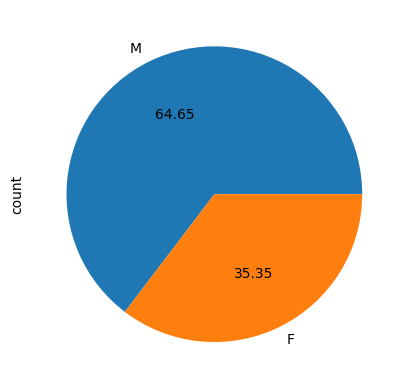

In [ ]:
df["gender"].value_counts().plot(kind="pie", autopct = "%.2f")

<Axes: xlabel='degree_t'>

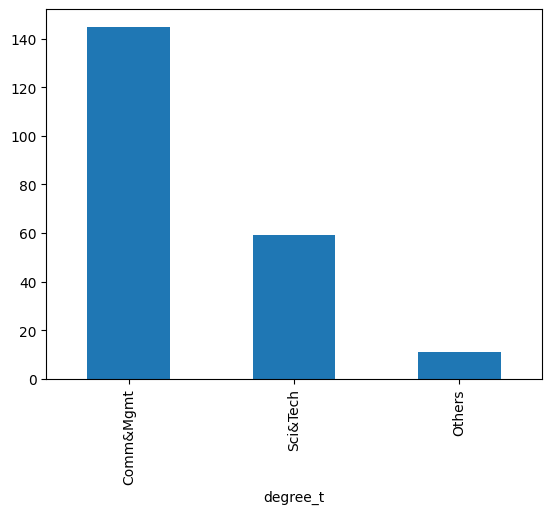

In [ ]:
df["degree_t"].value_counts().plot(kind="bar")

<Axes: xlabel='workex'>

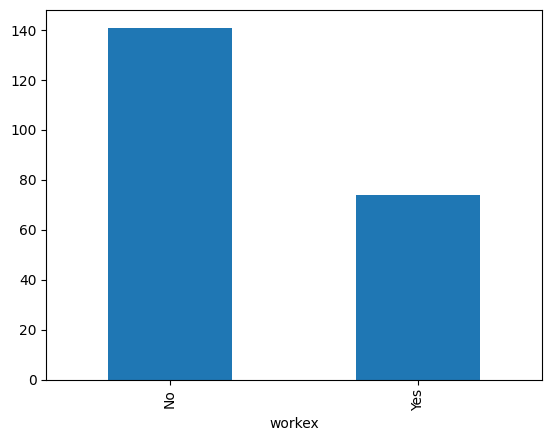

In [ ]:
df["workex"].value_counts().plot(kind="bar")

<Axes: xlabel='status'>

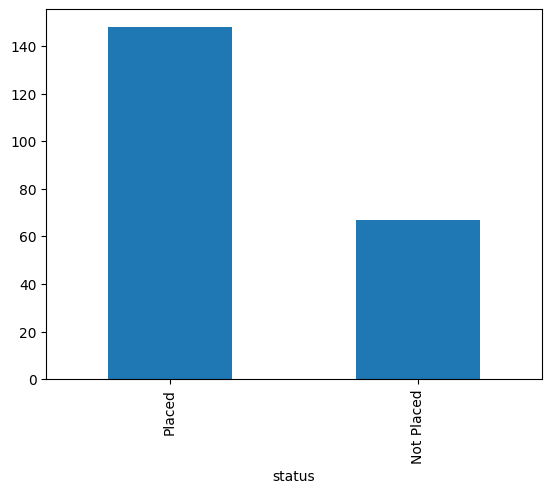

In [ ]:
df["status"].value_counts().plot(kind="bar")

<Axes: xlabel='specialisation'>

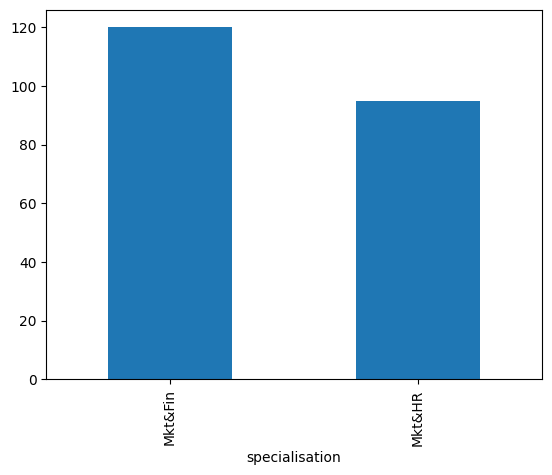

In [ ]:
df["specialisation"].value_counts().plot(kind="bar")

In [ ]:
#numerical data role by univariate analysis

In [ ]:
import matplotlib.pyplot as plt

(array([12., 41., 75., 55., 32.]),
 array([40.89 , 50.592, 60.294, 69.996, 79.698, 89.4  ]),
 <BarContainer object of 5 artists>)

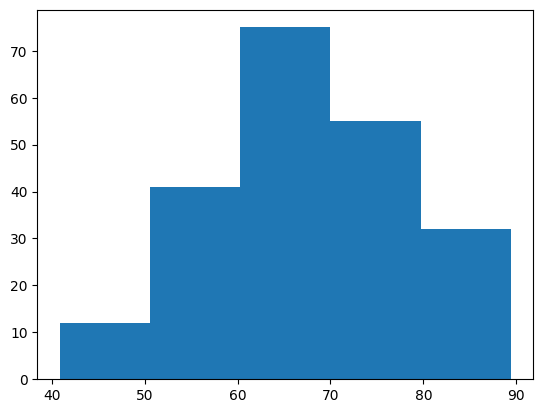

In [ ]:
plt.hist(df["ssc_p"],bins = 5)

(array([ 12.,  49., 105.,  36.,  13.]),
 array([37.  , 49.14, 61.28, 73.42, 85.56, 97.7 ]),
 <BarContainer object of 5 artists>)

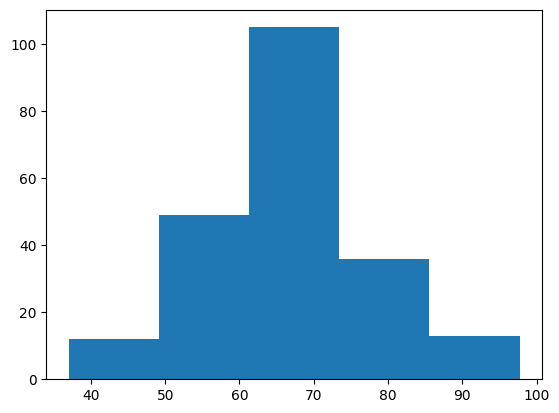

In [ ]:
plt.hist(df["hsc_p"],bins = 5)

(array([35., 84., 69., 23.,  4.]),
 array([50. , 58.2, 66.4, 74.6, 82.8, 91. ]),
 <BarContainer object of 5 artists>)

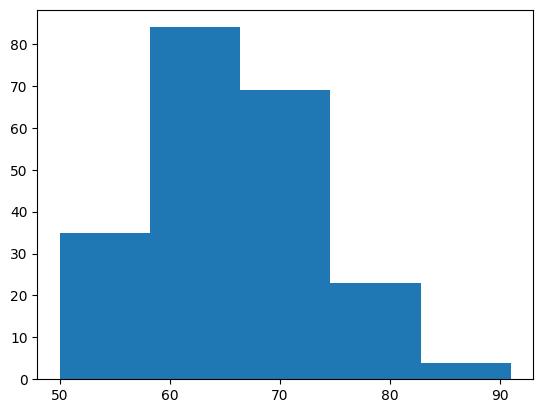

In [ ]:
plt.hist(df["degree_p"],bins = 5)

(array([45., 57., 42., 37., 34.]),
 array([50. , 59.6, 69.2, 78.8, 88.4, 98. ]),
 <BarContainer object of 5 artists>)

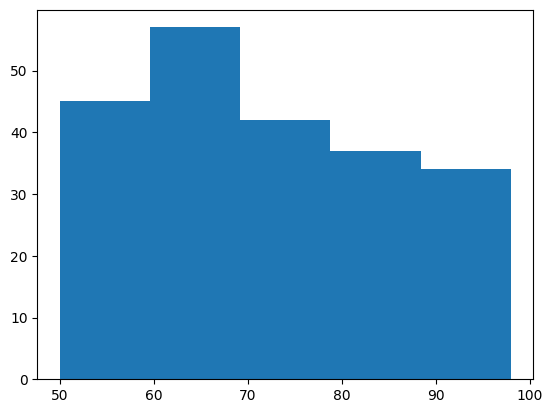

In [ ]:
plt.hist(df["etest_p"],bins = 5)

(array([34., 72., 67., 32., 10.]),
 array([51.21 , 56.546, 61.882, 67.218, 72.554, 77.89 ]),
 <BarContainer object of 5 artists>)

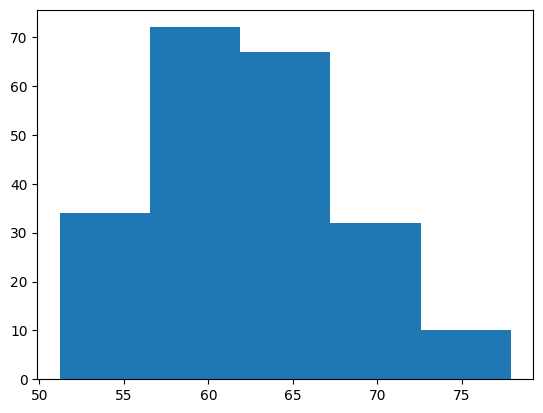

In [ ]:
plt.hist(df["mba_p"],bins = 5)

(array([123.,  19.,   3.,   2.,   1.]),
 array([200000., 348000., 496000., 644000., 792000., 940000.]),
 <BarContainer object of 5 artists>)

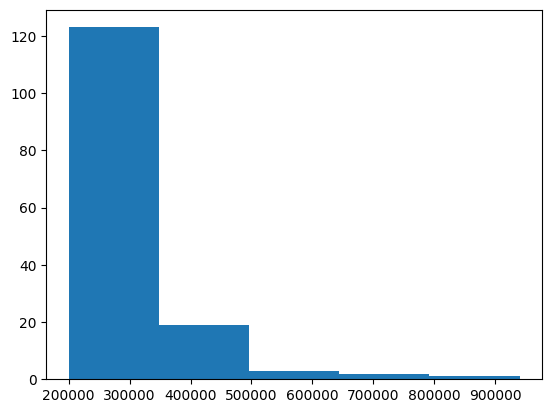

In [ ]:
plt.hist(df["salary"],bins = 5)

In [ ]:
import seaborn as sns

<ipython-input-124-4c41f212cbcf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["salary"])


<Axes: xlabel='salary', ylabel='Density'>

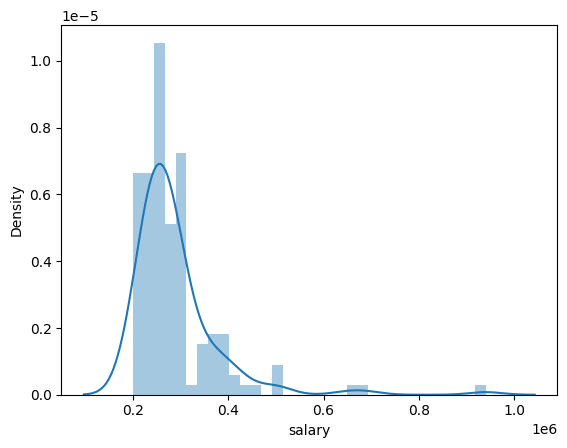

In [ ]:
sns.distplot(df["salary"])

<Axes: ylabel='salary'>

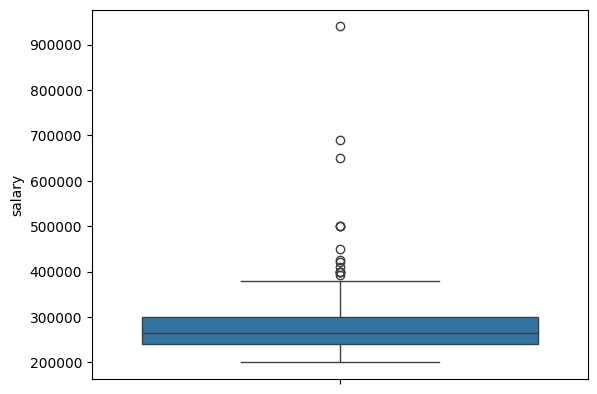

In [ ]:
sns.boxplot(df["salary"])

<Axes: ylabel='ssc_p'>

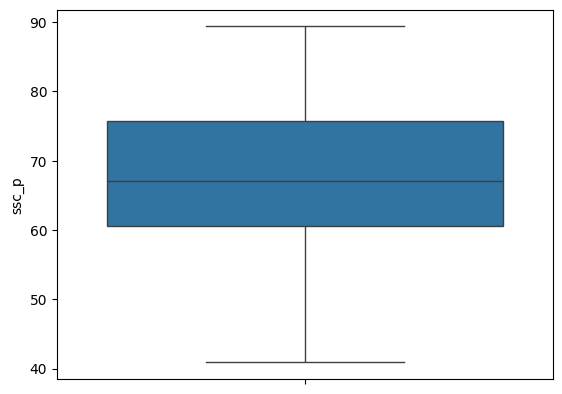

In [ ]:
sns.boxplot(df["ssc_p"])

<Axes: ylabel='hsc_p'>

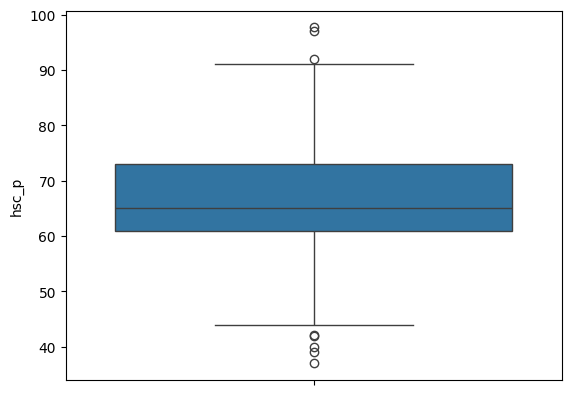

In [ ]:
sns.boxplot(df["hsc_p"])

<Axes: ylabel='etest_p'>

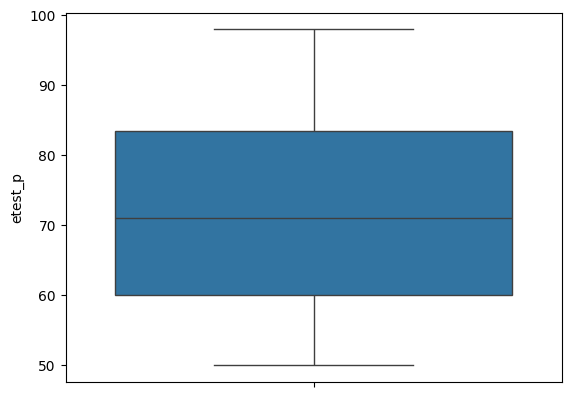

In [ ]:
sns.boxplot(df["etest_p"])

<Axes: ylabel='mba_p'>

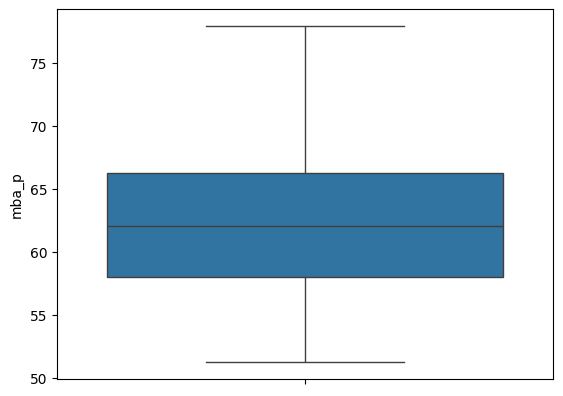

In [ ]:
sns.boxplot(df["mba_p"])

<Axes: ylabel='degree_p'>

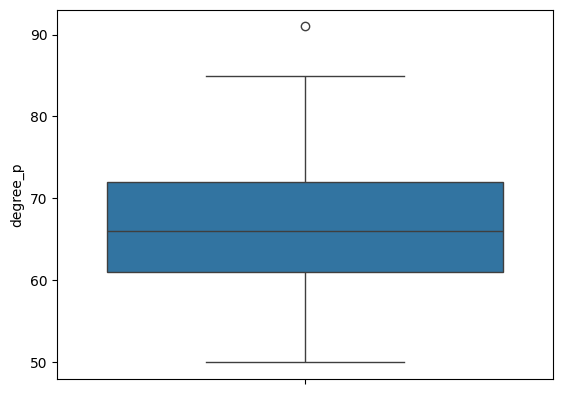

In [ ]:
sns.boxplot(df["degree_p"])

In [ ]:
# Bivariate and multivariate analysis

In [ ]:
# Numerical to numerical

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


<Axes: xlabel='etest_p', ylabel='salary'>

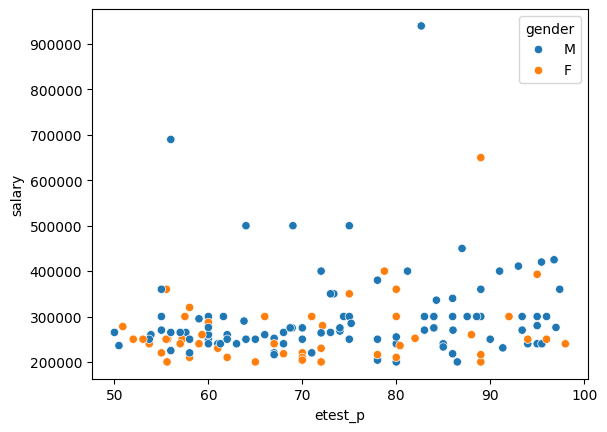

In [ ]:
sns.scatterplot(x="etest_p", y="salary", data=df, hue = "gender")

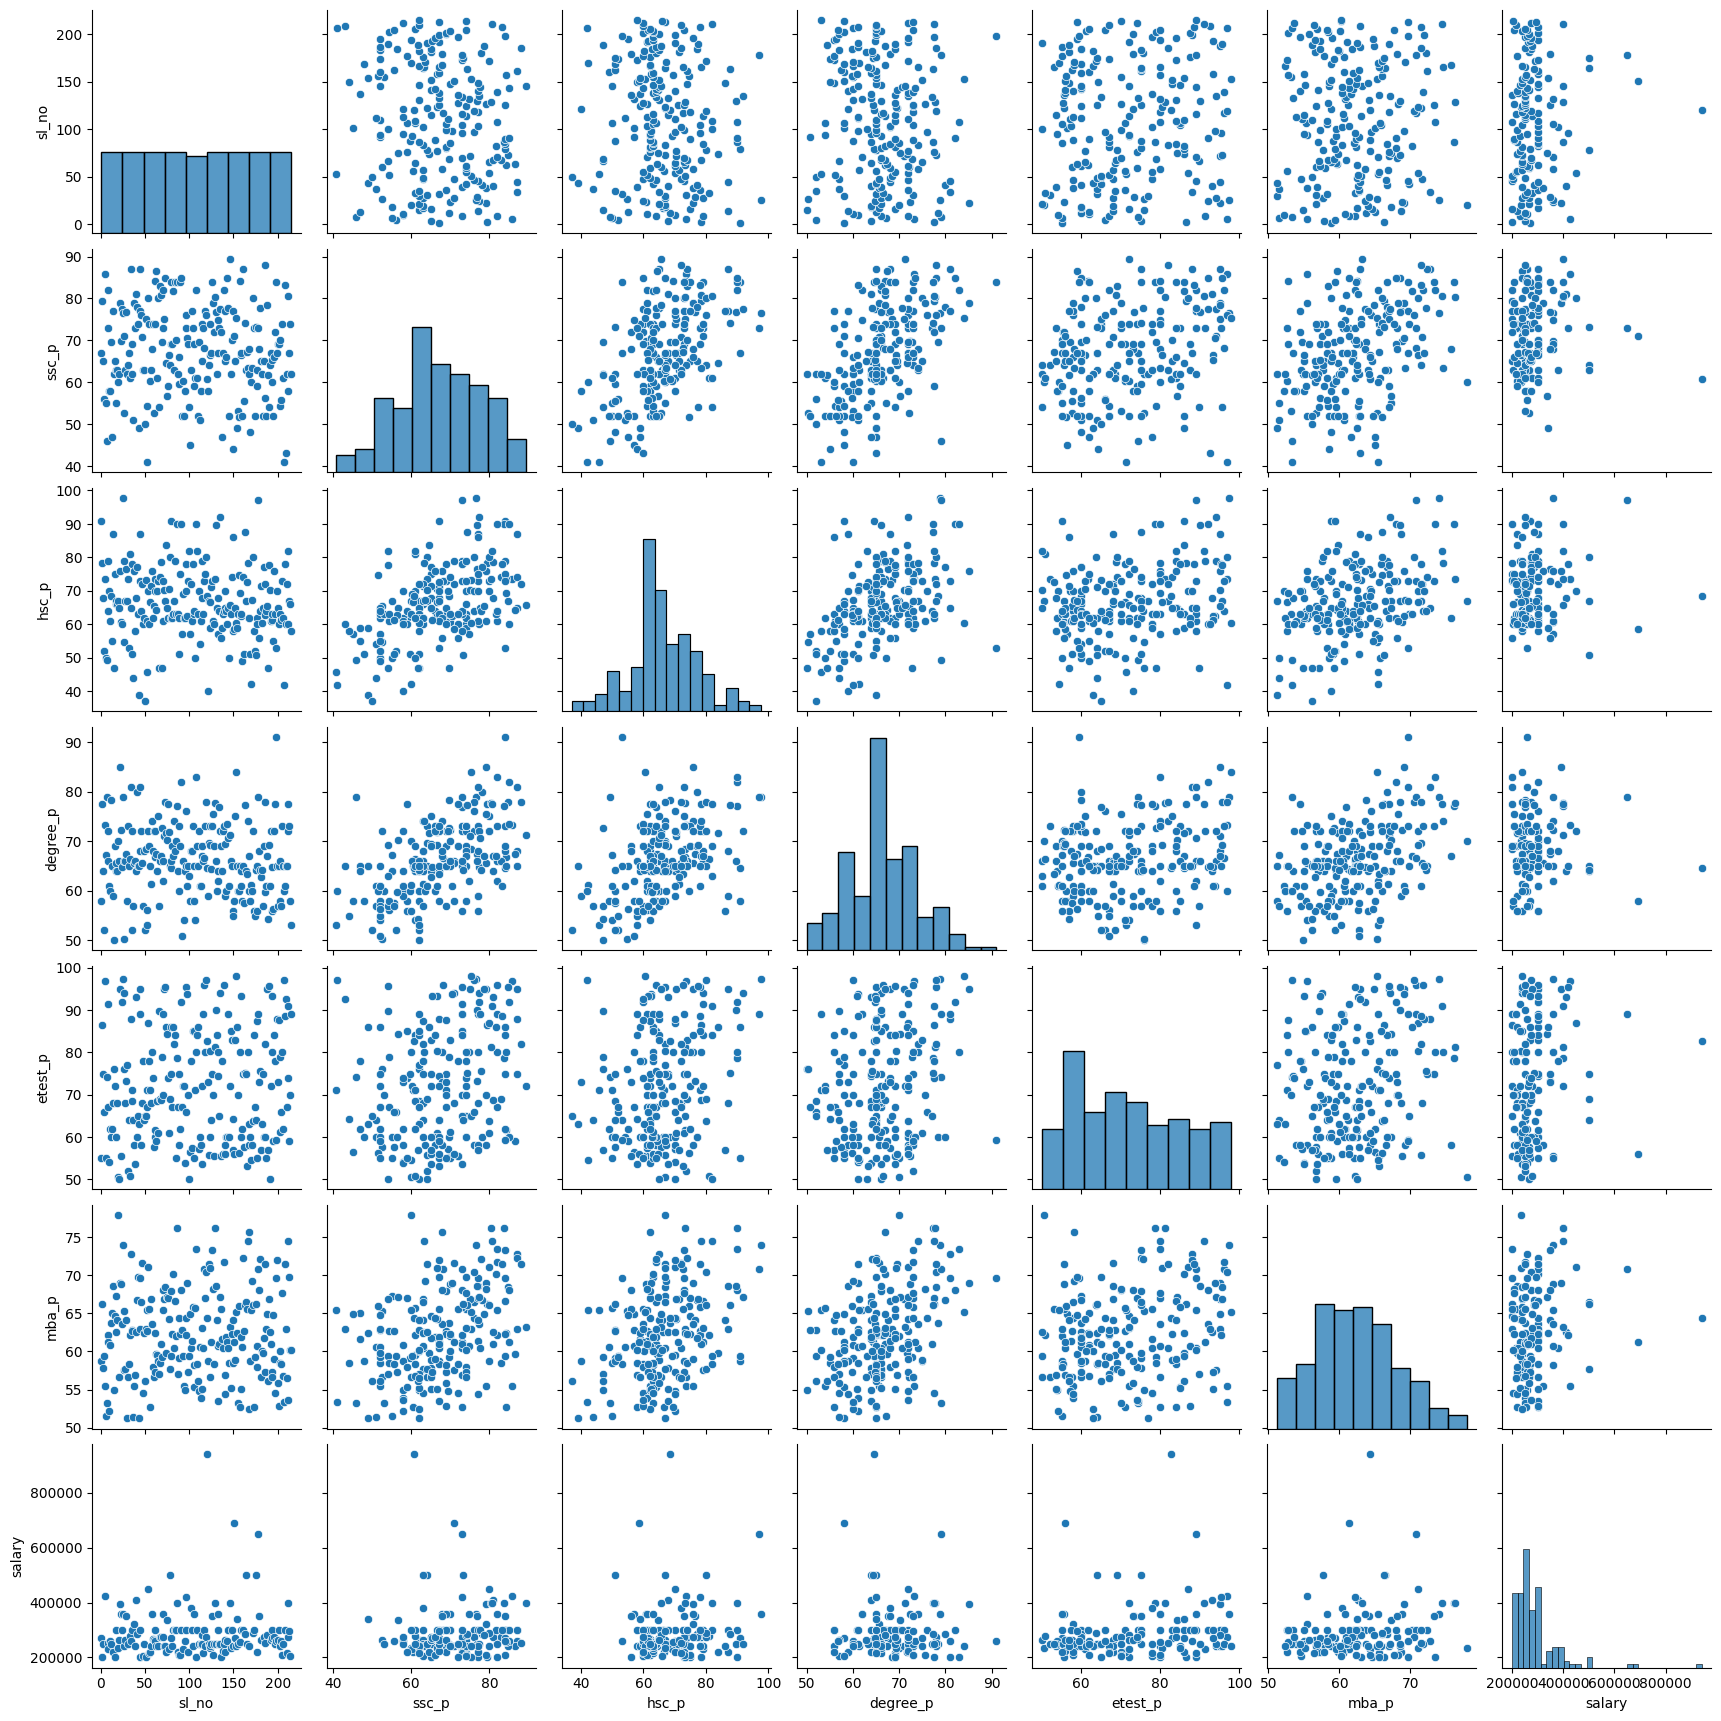

In [ ]:
sns.pairplot(df)

<Axes: xlabel='mba_p', ylabel='salary'>

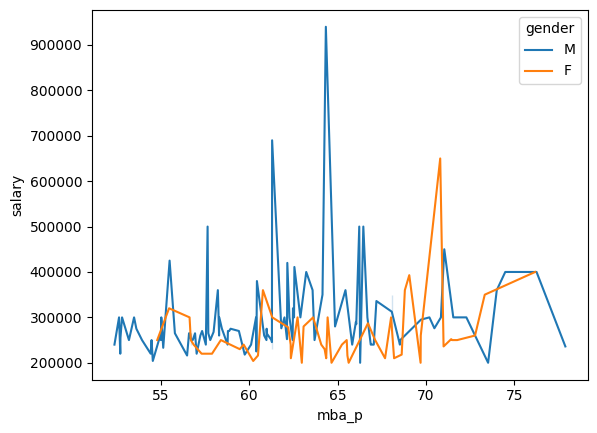

In [ ]:
sns.lineplot(x="mba_p", y="salary", data=df, hue = "gender")

In [ ]:
# Numerical-categorical analysis

<Axes: xlabel='status', ylabel='degree_p'>

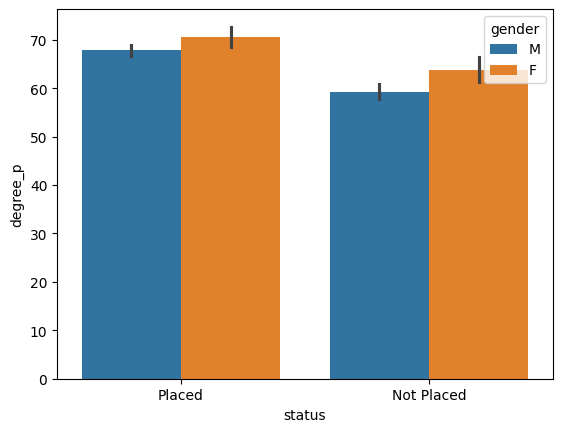

In [ ]:
sns.barplot(x="status",y= "degree_p",data = df,hue = "gender")

<Axes: xlabel='status', ylabel='degree_p'>

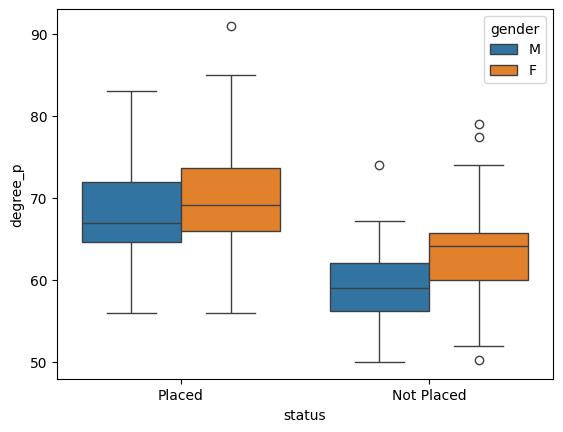

In [ ]:
sns.boxplot(x="status",y= "degree_p",data = df,hue = "gender")

In [ ]:
# categorical-categorical

In [ ]:
pd.crosstab(df["specialisation"],df["status"])

status,Not Placed,Placed
specialisation,,
Mkt&Fin,25,95
Mkt&HR,42,53


<Axes: xlabel='status', ylabel='specialisation'>

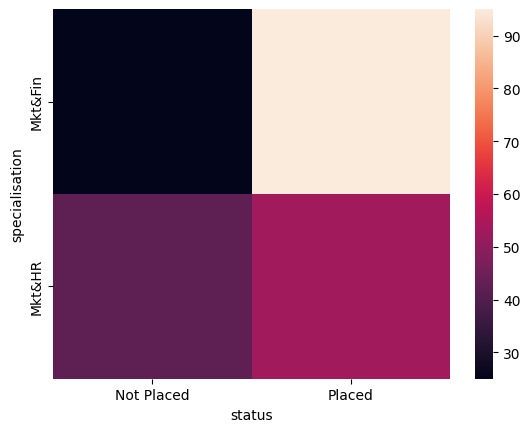

In [ ]:
sns.heatmap(pd.crosstab(df["specialisation"],df["status"]))

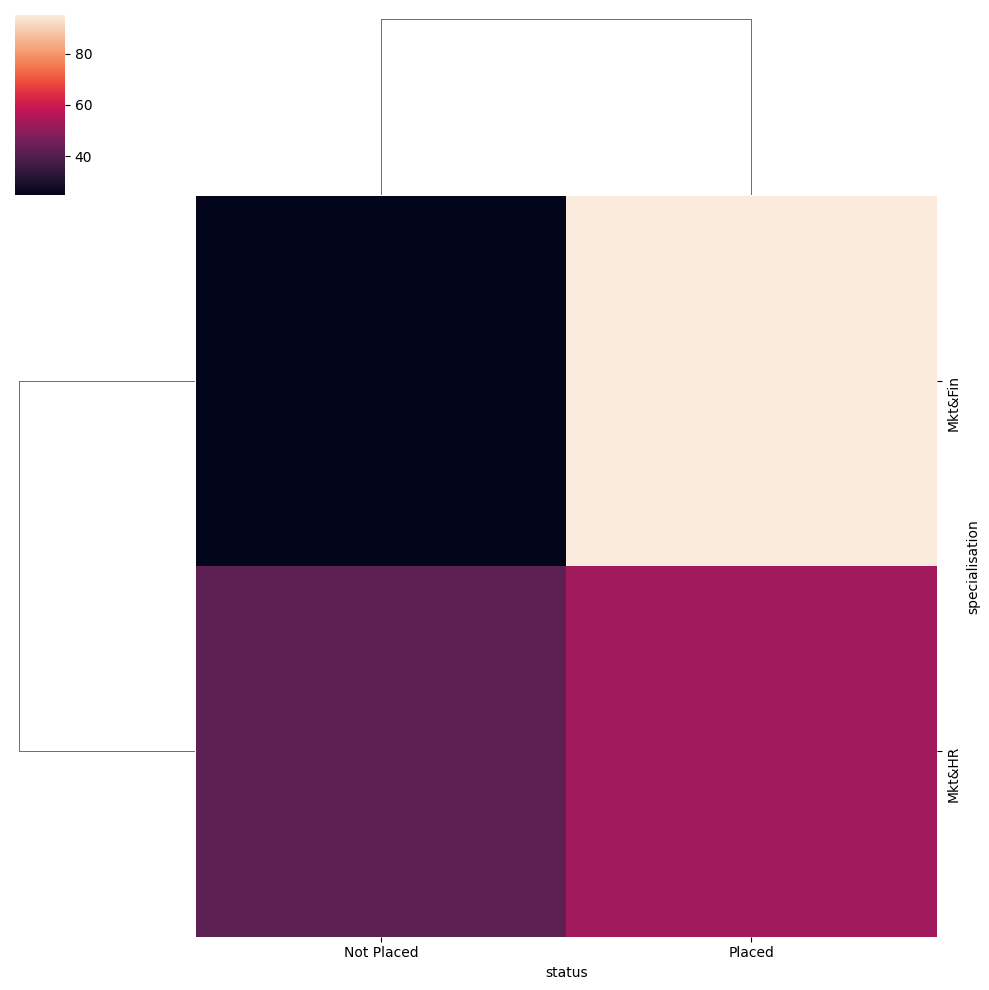

In [ ]:
sns.clustermap(pd.crosstab(df["specialisation"],df["status"]))

In [ ]:
df.groupby("specialisation")["status"].value_counts(normalize=True)*100

specialisation  status    
Mkt&Fin         Placed        79.166667
                Not Placed    20.833333
Mkt&HR          Placed        55.789474
                Not Placed    44.210526
Name: proportion, dtype: float64

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
prof = ProfileReport(df)
prof.to_file(output_file= "placement_file.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#feature engineering

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
# feature engineering

In [ ]:
df["salary"]=df["salary"].fillna(df["salary"].mean())

In [ ]:
df.dtypes


sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [ ]:
# Handling with Catagorical Data

In [ ]:
# we convert object type data into numerical datatype

df['gender']=df['gender'].astype('category')
df['status']=df['status'].astype('category')
df['workex']=df['workex'].astype('category')
df['hsc_b']=df['hsc_b'].astype('category')
df['ssc_b']=df['ssc_b'].astype('category')

In [ ]:
df.dtypes

sl_no                int64
gender            category
ssc_p              float64
ssc_b             category
hsc_p              float64
hsc_b             category
hsc_s               object
degree_p           float64
degree_t            object
workex            category
etest_p            float64
specialisation      object
mba_p              float64
status            category
salary             float64
dtype: object

In [ ]:
print(df['gender'].unique())
print(df['status'].unique())
print(df['workex'].unique())
print(df['hsc_b'].unique())
print(df['ssc_b'].unique())

['M', 'F']
Categories (2, object): ['F', 'M']
['Placed', 'Not Placed']
Categories (2, object): ['Not Placed', 'Placed']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['Others', 'Central']
Categories (2, object): ['Central', 'Others']
['Others', 'Central']
Categories (2, object): ['Central', 'Others']


In [ ]:
df["gender"].replace(["F","M"],[0,1],inplace=True)
df["status"].replace(['Placed',"Not Placed"],[1,0],inplace=True)

df['workex'].replace(to_replace ="Yes", value =1,inplace=True)
df['workex'].replace(to_replace ="No", value =0,inplace=True)

In [ ]:
df["gender"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(
    df[['ssc_p','hsc_p','degree_p','workex','etest_p','mba_p']],
    df.status,
    test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


In [ ]:
# create a logistic regresssion model and fit it.
def lr_model(x_train,y_train,x_test,y_test):
    print("Using Logistic Regression Method")
    model=LogisticRegression()
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('Accuracy {0:.2f}%'.format((accuracy_score(y_test,prediction)*100)))
    print(classification_report(y_test,prediction))

In [ ]:
lr_model(x_train,y_train,x_test,y_test)

Using Logistic Regression Method
Accuracy 93.02%
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.96      0.93      0.95        29

    accuracy                           0.93        43
   macro avg       0.92      0.93      0.92        43
weighted avg       0.93      0.93      0.93        43



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def rfc_model(x_train,y_train,x_test,y_test):
    print("using Random Forest Classification method")
    model=RandomForestClassifier(n_estimators =14, criterion = 'entropy', random_state = 41)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('Accuracy {0:.2f}%'.format((accuracy_score(y_test,prediction)*100)))
    print(classification_report(y_test,prediction))

In [ ]:
rfc_model(x_train,y_train,x_test,y_test)

using Random Forest Classification method
Accuracy 88.37%
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.90      0.93      0.92        29

    accuracy                           0.88        43
   macro avg       0.87      0.86      0.87        43
weighted avg       0.88      0.88      0.88        43



In [ ]:
data = pd.read_csv('placement_data.csv')

In [ ]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
data["salary"]=data["salary"].fillna(data["salary"].mean())


In [ ]:
df1= data.drop( ['sl_no', 'gender','ssc_p',"hsc_p","hsc_b","hsc_s","degree_p","degree_t","etest_p","mba_p","status","ssc_b"], axis=1)
df1.head(10)

,workex,specialisation,salary
0,No,Mkt&HR,270000.000000
1,Yes,Mkt&Fin,200000.000000
2,No,Mkt&Fin,250000.000000
3,No,Mkt&HR,288655.405405
4,No,Mkt&Fin,425000.000000
5,Yes,Mkt&Fin,288655.405405
6,No,Mkt&Fin,288655.405405
7,Yes,Mkt&Fin,252000.000000
8,No,Mkt&Fin,231000.000000
9,No,Mkt&Fin,288655.405405


In [ ]:
df1['workex'].replace(to_replace ="Yes", value =1,inplace=True)
df1['workex'].replace(to_replace ="No", value =0,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['specialisation'] = label_encoder.fit_transform(df1['specialisation'])
df1.head()

,workex,specialisation,salary
0,0,1,270000.000000
1,1,0,200000.000000
2,0,0,250000.000000
3,0,1,288655.405405
4,0,0,425000.000000


In [ ]:
average_p = (data['ssc_p'] + data['hsc_p'] + data['degree_p'] + data['etest_p'] + data['mba_p'])/5

df1['avg_p'] = average_p

In [ ]:
df1.head()

,workex,specialisation,salary,avg_p
0,0,1,270000.000000,65.960
1,1,0,200000.000000,77.584
2,0,0,250000.000000,65.960
3,0,1,288655.405405,57.086
4,0,0,425000.000000,77.000


In [ ]:
x=df1[['workex', 'specialisation','avg_p']]
x.shape

(215, 3)

In [ ]:
x.head(5)

,workex,specialisation,avg_p
0,0,1,65.960
1,1,0,77.584
2,0,0,65.960
3,0,1,57.086
4,0,0,77.000


In [ ]:
y=df1[['salary']]
y.head(5)

,salary
0,270000.000000
1,200000.000000
2,250000.000000
3,288655.405405
4,425000.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state = 9598)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(172, 3)
(43, 3)
(172, 1)
(43, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[274659.22894994],
       [292077.11605279],
       [308692.24508731],
       [287590.04177563],
       [270262.37314033],
       [282223.17984687],
       [271338.33655355],
       [266346.26694088],
       [272769.13896474],
       [301055.40118305],
       [310992.97536451],
       [313295.13644413],
       [290082.57749158],
       [294128.8087948 ],
       [291790.8776549 ],
       [272072.33819049],
       [285767.27741941],
       [269777.33112293],
       [298162.24079196],
       [291012.59905885],
       [267576.75701451],
       [277535.14179644],
       [266629.5658183 ],
       [289408.6695559 ],
       [302552.67194086],
       [268184.84803927],
       [273461.64733176],
       [267877.22552086],
       [298044.21354318],
       [307005.32904451],
       [272617.47390916],
       [276276.03567459],
       [287066.44600877],
       [309649.4519004 ],
       [286332.44437183],
       [302914.6649509 ],
       [299954.33476213],
       [304044.99885574],
       [2717

In [ ]:
# to Calculate the Accuracy of the Model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error
# to print the mean absolute percentage
per_e = mean_absolute_percentage_error(y_test,y_pred)
per_e
# to print the accuracy in percentage
acc1 = (1-per_e)*100
acc1

83.52740323813225

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model2 = KNeighborsRegressor()
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
error2 = mean_absolute_percentage_error(y_test,y_pred2)
acc2 = (1-error2)*100
acc2

85.01237125407762

In [ ]:
# DecisionTree Regressor

from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor()
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
error3 = mean_absolute_percentage_error(y_test,y_pred3)
acc3 = (1-error3)*100
acc3

76.41307522439561

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor()
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
error4 = mean_absolute_percentage_error(y_test,y_pred4)
acc4 = (1-error4)*100
acc4

<ipython-input-187-9b488cee9232>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(x_train,y_train)


82.8798818513594

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2
